In [1]:
import meep as mp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.constants as spy
import time
from numpy.fft import fft, ifft, fftfreq

In [2]:
def Dnsqr(omega,T):
    x = np.abs(omega/T)
    if x > 1e-3:
        tmp = omega / (np.exp(omega/T)-1)
        output = 6*spy.hbar**2/np.pi/T**2* tmp
    else:
        output = 6*spy.hbar**2/np.pi/T**2*omega*(1 - x/2 + x **2/12 -x**4/720) ## Taylor expansion
    
    return  np.sqrt(output)

In [4]:
tsim=7*10**(-12)
l=np.linspace(-2**21,2**21-1,2**22)
M = 2**(21)
ml = np.random.normal(0,1,1000)
nl = np.random.normal(0,1,1000)
omegal = 2*np.pi*np.linspace(-2**21,2**21-1,2**22)/tsim



tslice = np.linspace(0, tsim, 1000)

eps0 = 8.854187e-1
tempe = 1
delta1 = np.sqrt((2*spy.k)/(eps0*6*spy.hbar*spy.c))

dlsqr = np.empty(1000)

for i in range(1000):
     dlsqr[i] = Dnsqr(omegal[i],tempe) 

fc = (ml + 1j * nl) * dlsqr
Ef = ifft(fc)

(0.0, 1e-12)

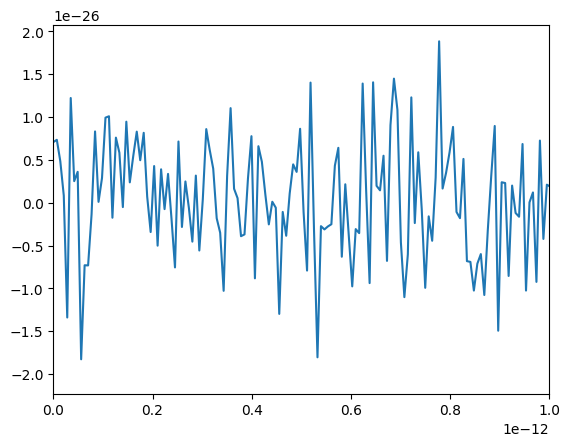

In [11]:
plt.plot(tslice,np.real(Ef))
plt.xlim(0,1e-12)

In [12]:
ef2 = ifft(Ef)